In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load GPT4o

In [4]:
raw_gpt4o = np.load("../data/results/task_3/finetuning_on_gpt-4o-mini_new_results.npy")
raw_gpt4o.shape

(4, 10, 5, 3)

In [19]:
f1_mean_gpt4o_0cases = np.mean(raw_gpt4o[1, :, :, 2], axis=(0))
f1_std_gpt4o_0cases = np.std(raw_gpt4o[1, :, :, 2], axis=(0), ddof=1) / np.sqrt(10)

f1_mean_gpt4o_50cases = np.mean(raw_gpt4o[3, :, :, 2], axis=(0))
f1_std_gpt4o_50cases = np.std(raw_gpt4o[3, :, :, 2], axis=(0), ddof=1) / np.sqrt(10)

In [20]:
f1_mean_gpt4o_0cases, f1_std_gpt4o_0cases

(array([0.37697704, 0.33401737, 0.19294458, 0.09021323, 0.46319563]),
 array([0.07701805, 0.04935104, 0.04877647, 0.02023315, 0.10123391]))

In [21]:
f1_mean_gpt4o_50cases, f1_std_gpt4o_50cases

(array([0.6814466 , 0.43421332, 0.35432683, 0.33080549, 0.81929746]),
 array([0.0564311 , 0.07332103, 0.07674743, 0.06336246, 0.07568736]))

### Load Gemini

In [22]:
raw_gemini_zeroshot = np.load("../data/results/task_3/gemini_1-5_0shot.npy")
raw_gemini_fiveshot = np.load("../data/results/task_3/gemini_1-5_5shot.npy")

In [23]:
f1_mean_gemini_zeroshot = np.mean(raw_gemini_zeroshot[:, :, 2], axis=(0))
f1_std_gemini_zeroshot = np.std(raw_gemini_zeroshot[:, :, 2], axis=(0), ddof=1) / np.sqrt(10)

In [24]:
f1_mean_gemini_fiveshot = np.mean(raw_gemini_fiveshot[:, :, 2], axis=(0))
f1_std_gemini_fiveshot = np.std(raw_gemini_fiveshot[:, :, 2], axis=(0), ddof=1) / np.sqrt(10)

In [25]:
f1_mean_gemini_zeroshot,f1_std_gemini_zeroshot

(array([0.68897057, 0.42008453, 0.39623362, 0.36579847, 0.40228157]),
 array([0.07953037, 0.05491294, 0.08962469, 0.04870521, 0.05364947]))

In [26]:
f1_mean_gemini_fiveshot, f1_std_gemini_fiveshot

(array([0.74539868, 0.4362458 , 0.55701362, 0.46521038, 0.57760371]),
 array([0.06206531, 0.0519582 , 0.06120602, 0.03914563, 0.05495771]))

In [29]:
f1_means = np.array([f1_mean_gpt4o_0cases, f1_mean_gpt4o_50cases,f1_mean_gemini_zeroshot,  f1_mean_gemini_fiveshot])
f1_stds = np.array([f1_std_gpt4o_0cases,  f1_std_gpt4o_50cases, f1_std_gemini_zeroshot, f1_std_gemini_fiveshot])

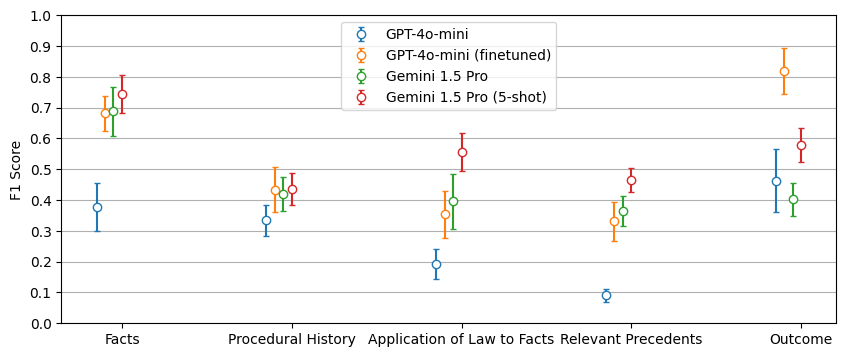

In [32]:
x_axis_labels = ['Facts', 'Procedural History', 'Application of Law to Facts', 'Relevant Precedents', 'Outcome']
labels = ['GPT-4o-mini', 'GPT-4o-mini (finetuned)','Gemini 1.5 Pro', 'Gemini 1.5 Pro (5-shot)']

fig = plt.figure(figsize=(10, 4))

for i in range(f1_means.shape[0]):
    x_axis = [k-0.1+i*0.05 for k in range(5)] 
    plt.errorbar(x_axis, f1_means[i], yerr=f1_stds[i], fmt='o', markerfacecolor='white', capsize=2, label=f"{labels[i]}")

# plt.axhline(1, color='black', linestyle='dashed')
xticks = np.arange(0, 5)
fig.axes[0].set_xticks(x_axis, labels=x_axis_labels)

plt.yticks(np.linspace(0, 1, 11))
plt.grid(axis='y', which='major')
plt.ylabel("F1 Score")
plt.ylim([0, 1])
plt.legend(loc='best')
plt.savefig("../figures/task_3_final.png", bbox_inches='tight', dpi=300)
plt.show()